# Lab 08 - Amplitude Modulation and Complex Lowpass Signals

### Maurice Woods

### 11 April 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - AM Transmitter/Receiver

In [1]:
from pylab import *
import ecen4652 as ecen
import quick
import filtfun
import amfun
import showfun

##### Part A)

Modify your trapfilt function in the filtfun module so that it can be used as either a lowpass or a bandpass filter with trapezoidal frequency response.

To test your modified trapfilt function, estimate the parameters of the BPF whose frequency response is shown below and recreate h(t) ⇔ H(f ) with your trapfilt function.

Low Pass Filter: fL= 1000 Hz


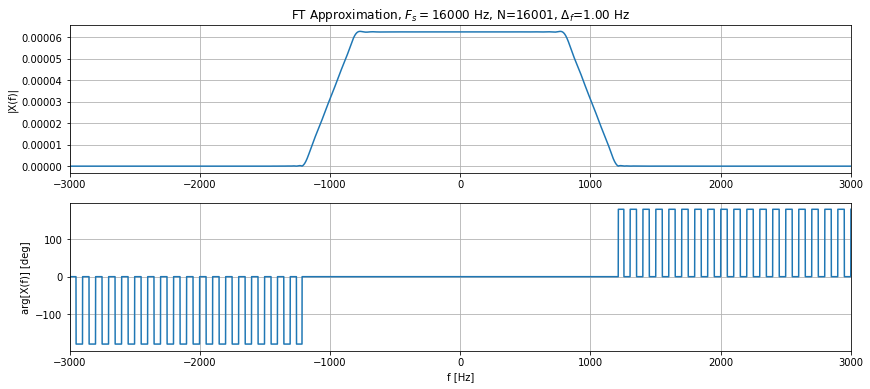

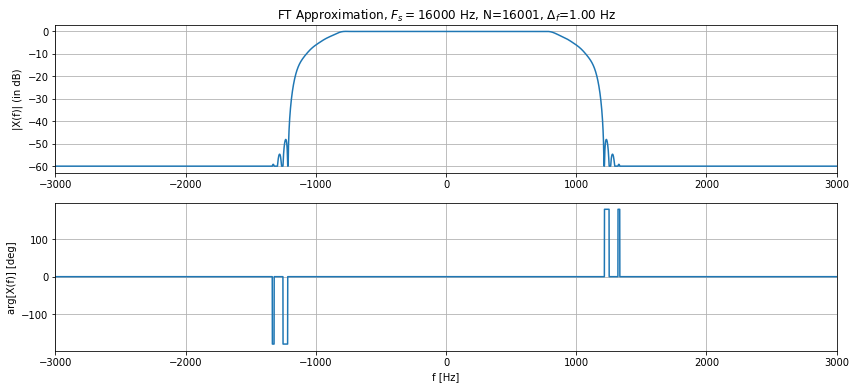

In [2]:
Fs=16000
t0=-0.5
t=1
xt=concatenate([zeros(int(Fs/2)),[1],zeros(Fs-int(Fs/2))])
sig_xt=ecen.sigWave(xt, Fs, t0)
k=20
alfa=0.2

fL=1000
fparms=[fL]
[trap_xt,n]=filtfun.trapfilt1(sig_xt,fparms,k,alfa)
showfun.showft(trap_xt,[-3000,3000,0])
showfun.showft(trap_xt,[-3000,3000,-60])

Band Pass Filter: fBW= 500 Hz, fc= 2000 Hz


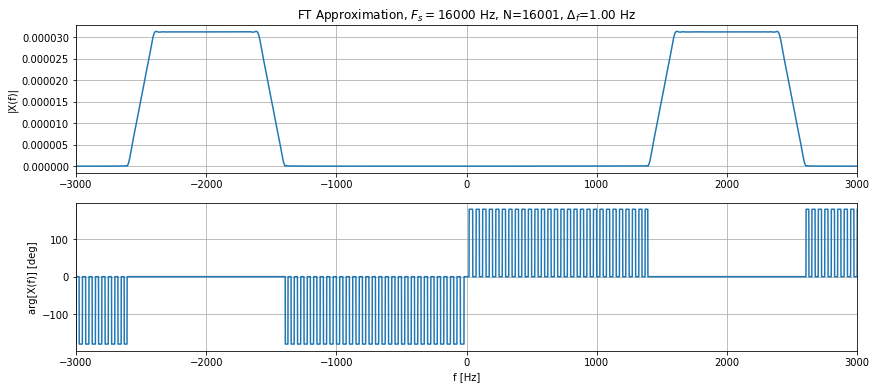

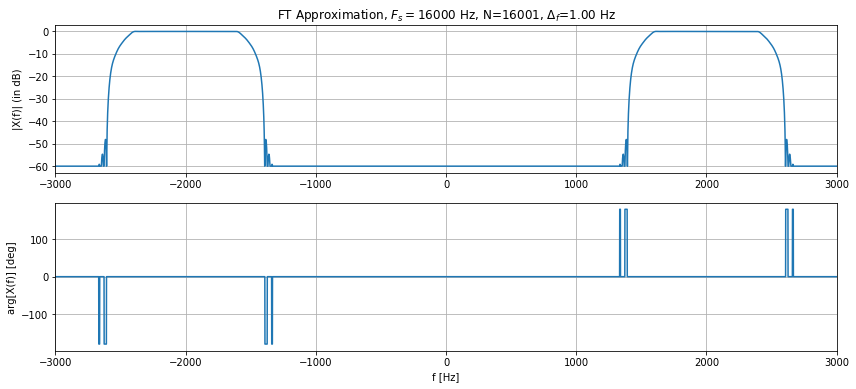

In [3]:
fBW=500
fc=2000
fparms=[fBW,fc]
[trap_xt,n]=filtfun.trapfilt1(sig_xt,fparms,k,alfa)
showfun.showft(trap_xt,[-3000,3000,0])
showfun.showft(trap_xt,[-3000,3000,-60])

##### Part B)

Start a new Python module, called amfun.py, and write a function, called $amxmtr()$ which performs the tasks of an AM transmitter to produce AM-DSB-SC, AM-DSB-TC, AM-SSB, and AM-VSB signals for a real-valued (wideband) message signal m(t). Test it with the following:

> First, let's try to replicate the example in the Lab (section 1.5)

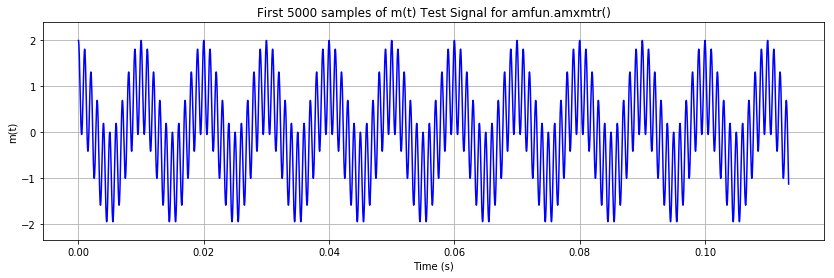

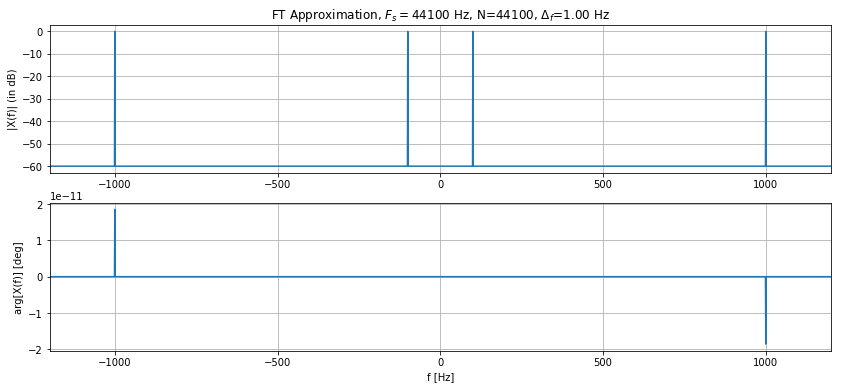

Low Pass Filter: fL= 500 Hz


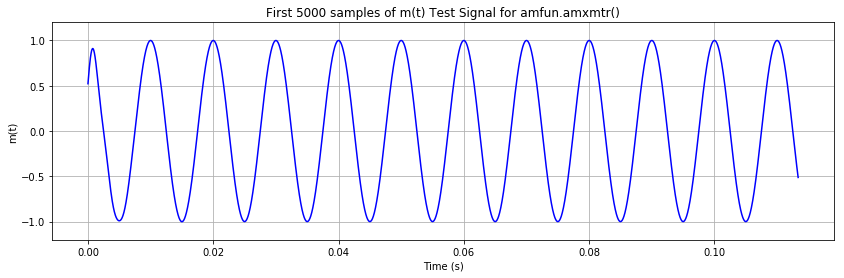

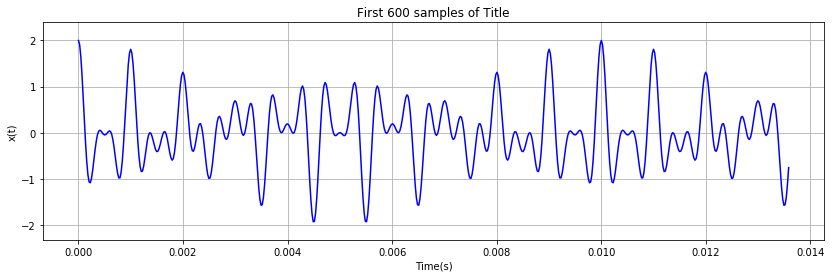

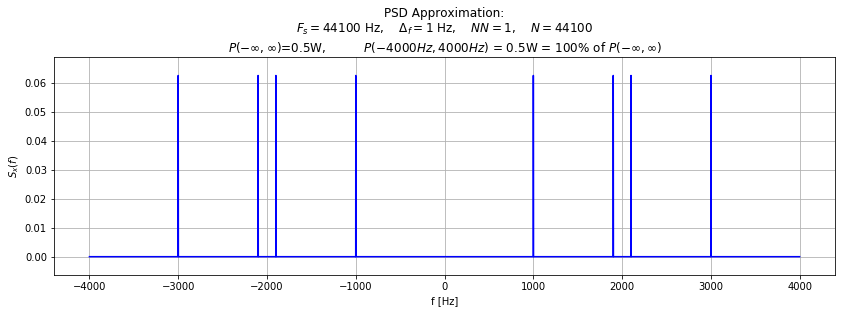

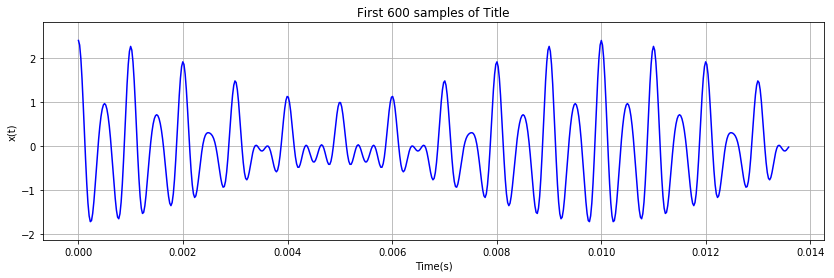

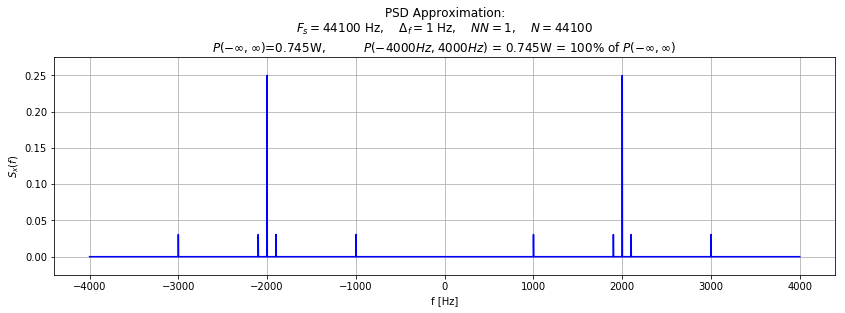

In [4]:
import amfun

Fs = 44100
tlen = 1.0
f0 = 100
f1 = 1000
tt = arange(round(tlen*Fs))/float(Fs)
mt = cos(2*pi*f0*tt) + cos(2*pi*f1*tt)
sig_mt = ecen.sigWave(mt, Fs, 0)

quick.quickplot(tt,mt,'-b',[],[],'','m(t) Test Signal for amfun.amxmtr()','Time (s)','m(t)',['first',5000])
showfun.showft(sig_mt,[-f1*1.2,f1*1.2,-60])

k=20
alfa=0.1
fL=500
fparms=[fL]
[test,order]=filtfun.trapfilt1(sig_mt,fparms,k,alfa)
quick.quickplot(tt,test.signal(),'-b',[],[],'','m(t) Test Signal for amfun.amxmtr()','Time (s)','m(t)',['first',5000])

fc = 2000
thetac = 0
fcparms=[fc,thetac]

fm = 4000
km = 15
alfam = 0.05
fmparms = [] # No low-pass filtering

sig_xt = amfun.amxmtr(sig_mt,'sc',fcparms,fmparms)
quick.quickplot(sig_xt.timeAxis(),sig_xt.signal(),'-b',[],[],'','Title','Time(s)','x(t)',['first',600])
showfun.showpsd1(sig_xt,[-4000,4000,100],Fs)

alfa = 0.7
fcparms=[fc,thetac,alfa]
sig_xt = amfun.amxmtr(sig_mt,'tc',fcparms,fmparms)
quick.quickplot(sig_xt.timeAxis(),sig_xt.signal(),'-b',[],[],'','Title','Time(s)','x(t)',['first',600])
showfun.showpsd1(sig_xt,[-4000,4000,100],Fs)

Low Pass Filter: fL= 10000 Hz


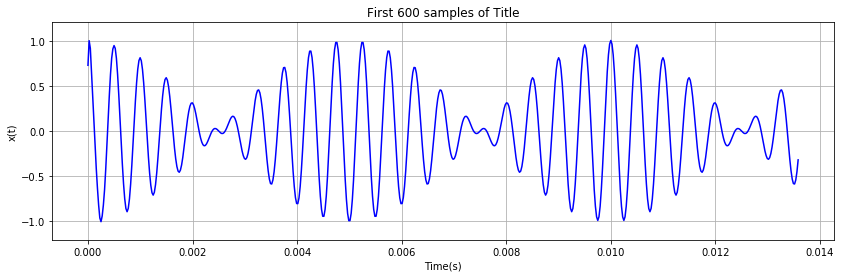

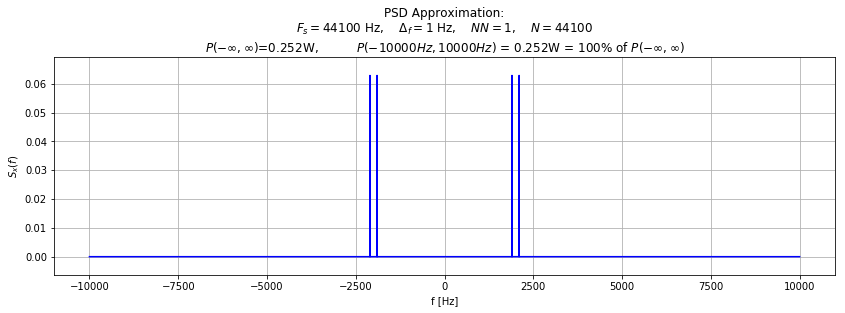

Low Pass Filter: fL= 10000 Hz


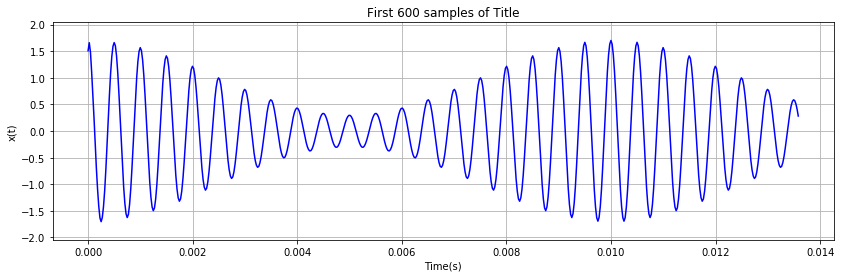

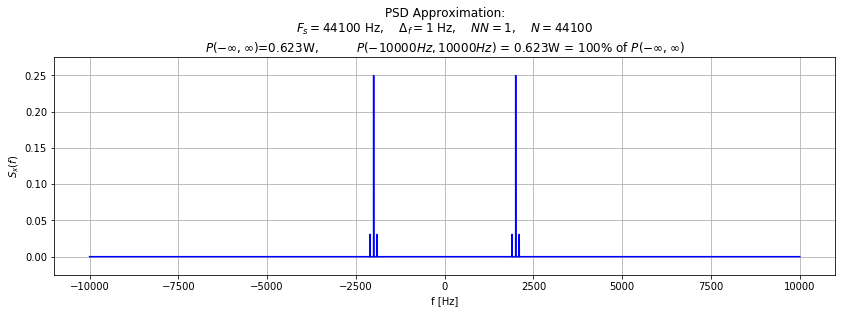

In [5]:
Fs = 44100
tlen = 1.0
f0 = 100
tt = arange(round(tlen*Fs))/float(Fs)
mt = cos(2*pi*f0*tt)
sig_mt = ecen.sigWave(mt, Fs, 0)

fc = 2000
thetac = 0
fcparms=[fc,thetac]

fm = 10000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam] # Now try low pass filtering


sig_xt = amfun.amxmtr(sig_mt,'sc',fcparms,fmparms)
quick.quickplot(sig_xt.timeAxis(),sig_xt.signal(),'-b',[],[],'','Title','Time(s)','x(t)',['first',600])
showfun.showpsd1(sig_xt,[-10000,10000,100],Fs)

alfa = 0.7
fcparms=[fc,thetac,alfa]
sig_xt = amfun.amxmtr(sig_mt,'tc',fcparms,fmparms)
quick.quickplot(sig_xt.timeAxis(),sig_xt.signal(),'-b',[],[],'','Title','Time(s)','x(t)',['first',600])
showfun.showpsd1(sig_xt,[-10000,10000,100],Fs)

> That looks pretty good! Now let's check out the actual signals of interest

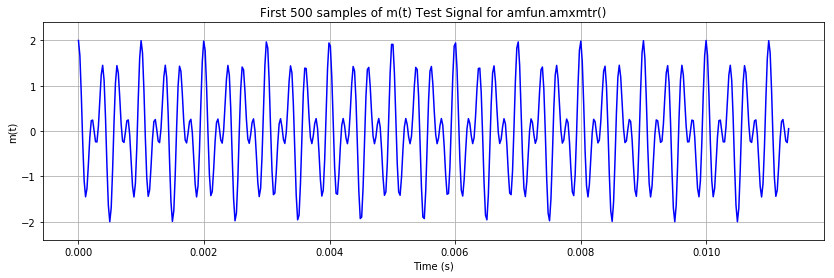

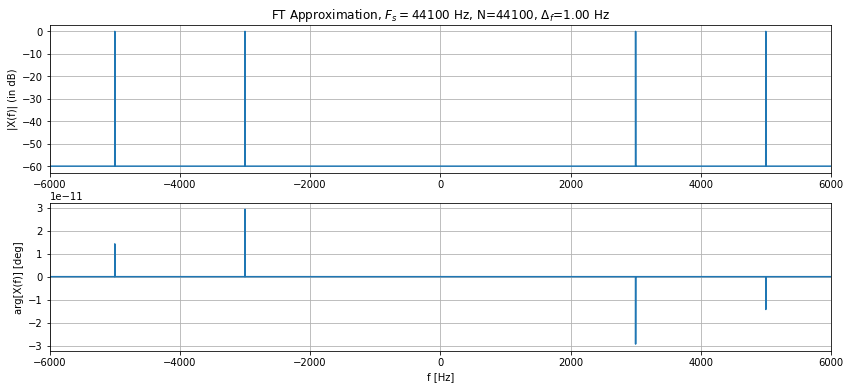

In [6]:
Fs = 44100
tlen = 1.0
f0,f1 = 3000,5000
tt = arange(round(tlen*Fs))/float(Fs)
mt = cos(2*pi*f0*tt) + cos(2*pi*f1*tt)
sig_mt = ecen.sigWave(mt, Fs, 0)

quick.quickplot(tt,sig_mt.signal(),'-b',[],[],'','m(t) Test Signal for amfun.amxmtr()','Time (s)','m(t)',['first',500])
showfun.showft(sig_mt,[-f1*1.2,f1*1.2,-60])

Low Pass Filter: fL= 4000 Hz


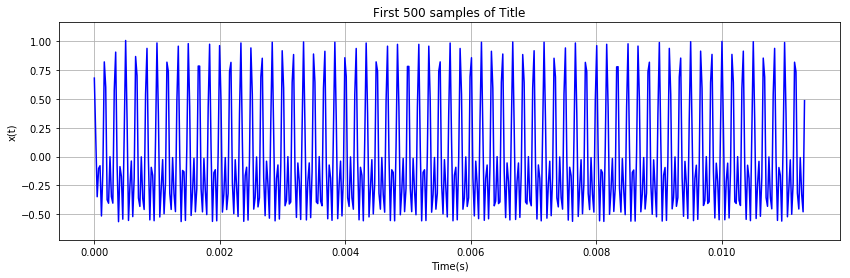

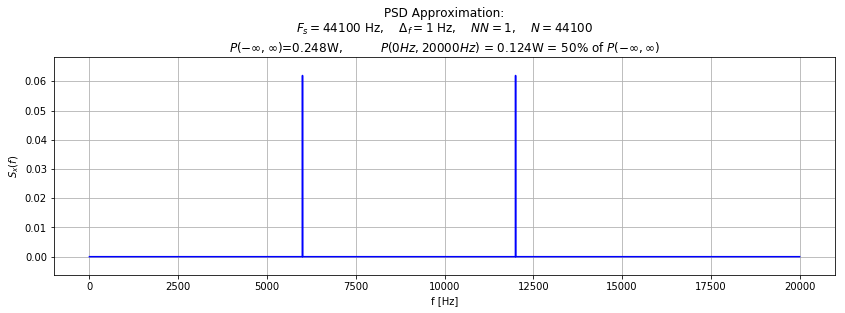

Low Pass Filter: fL= 4000 Hz


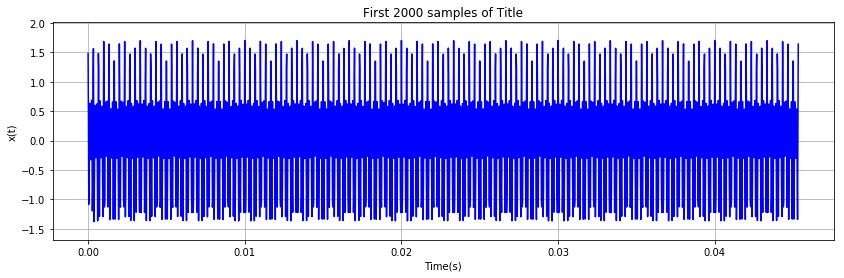

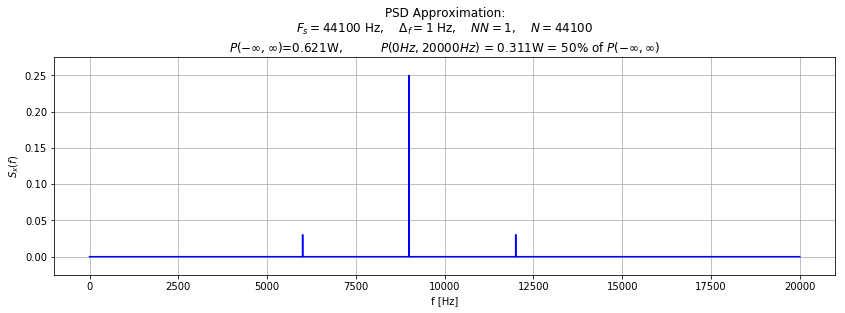

In [7]:
fc = 9000
thetac = 0
fcparms=[fc,thetac]

fm = 4000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

sig_xt = amfun.amxmtr(sig_mt,'sc',fcparms,fmparms)
quick.quickplot(sig_xt.timeAxis(),sig_xt.signal(),'-b',[],[],'','Title','Time(s)','x(t)',['first',500])
showfun.showpsd1(sig_xt,[-0,20000,100],Fs)

alfa = 0.7
fcparms=[fc,thetac,alfa]
sig_xt = amfun.amxmtr(sig_mt,'tc',fcparms,fmparms)
quick.quickplot(sig_xt.timeAxis(),sig_xt.signal(),'-b',[],[],'','Title','Time(s)','x(t)',['first',2000])
showfun.showpsd1(sig_xt,[0,20000,100],Fs)

##### Part C)

Use the speech signal in speech801.wav and the music signal in music801.wav to generate AM-DSB-SC signals x 1 (t) and x 2 (t), respectively, with f c = 8000 Hz, f m = 4000 Hz, k m ≈ 10 . . . 20, and α m = 0.05. Use θ c = −90 ◦ for the speech signal and θ c = 0 ◦ for the music signal. Adjust the carrier amplitude A c2 of x 2 (t) (modulated with the music signal)
such that the average powers P (x 1 (t)) and P (x 2 (t)) of the AM-DSB-SC signals are approximately equal. Create a third signal x 3 (t) = (x 1 (t) + x 2 (t))/ 2. Save the three signals in myam801.wav, myam802.wav, and myam803.wav, respectively, for later use. Display the PSDs of each of the three signals and compare them. Does the bandwidth for x 3 (t), which contains two message signals, change?

> ANSWER

Display also the PSDs of the squared AM signals x_1^2(t), x_2^2(t), and x_3^2 (t) and analyze them in the vcinity of 2f_c (zoom-in to a range of approximately 15900 to 16100 Hz). Is there any useful information that you can get from the squared signals? If so, what is this information and for which of the three signals is it actually present?

> ANSWER

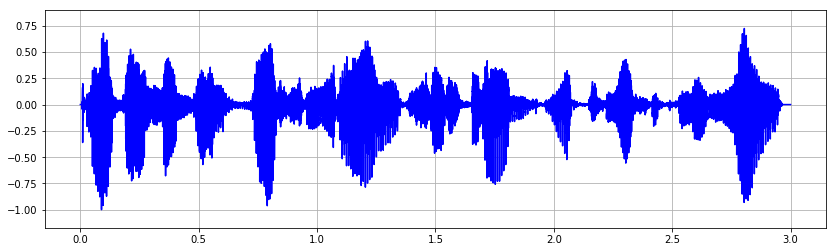

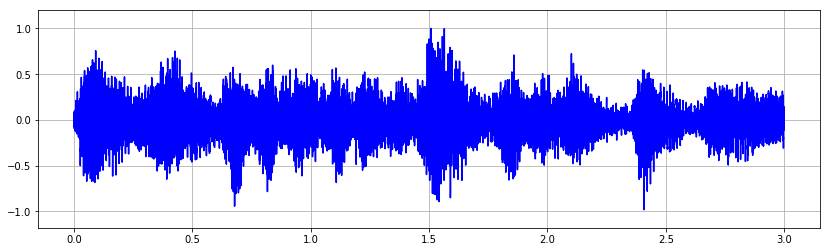

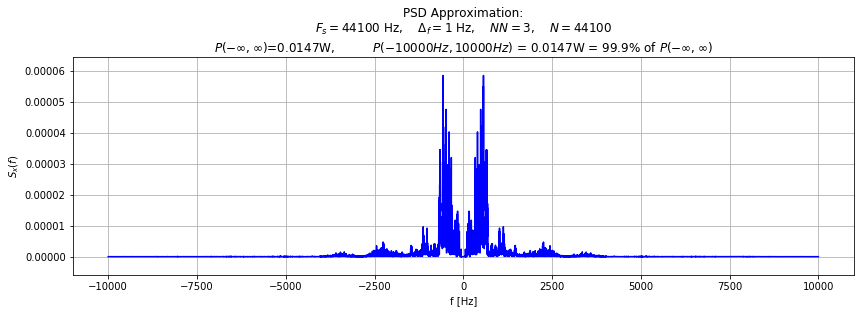

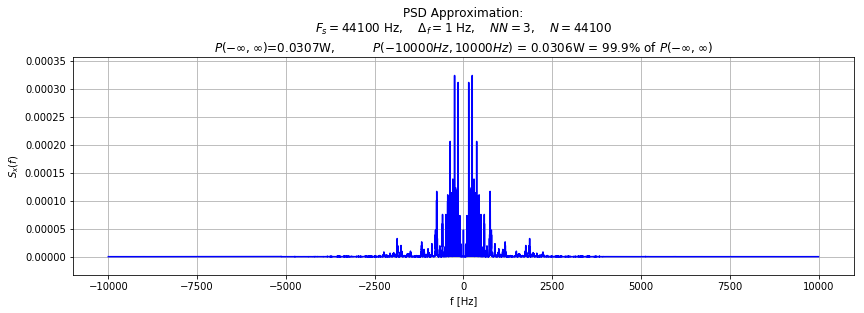

Low Pass Filter: fL= 4000 Hz


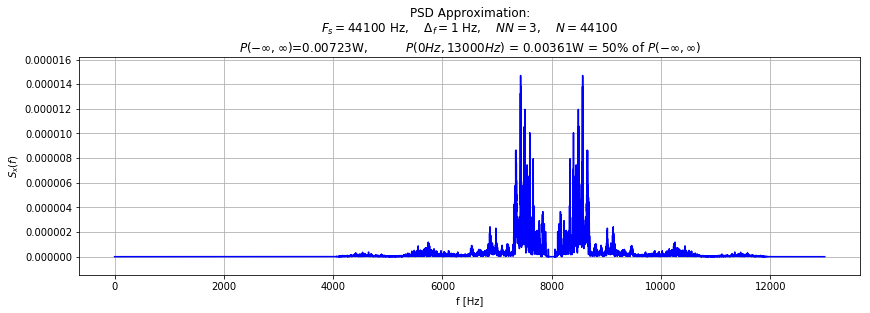

Low Pass Filter: fL= 4000 Hz


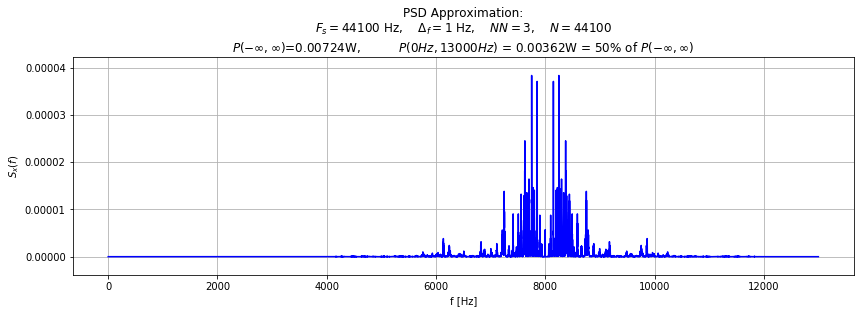

In [8]:
import wavfun
[speech801, framerate] = wavfun.wavread("speech801.wav")
[music801, framerate] = wavfun.wavread("music801.wav")

tt=quick.quicktt(speech801,framerate) # Same framerate, same length
quick.quickplot(tt,speech801)
quick.quickplot(tt,music801)

sig_mt_speech = ecen.sigWave(speech801, framerate)
sig_mt_music  = ecen.sigWave(music801, framerate)
showfun.showpsd1(sig_mt_speech,[-10000, 10000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_mt_music,[-10000, 10000, 0],framerate) #Plot S_x(f)

fc = 8000
thetac_speech = -pi/2
thetac_music = 0
Ac_music = 0.69
fcparms_speech=[fc,thetac_speech]
fcparms_music=[fc,thetac_music,Ac_music]

fm = 4000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

sig_xt_speech = amfun.amxmtr(sig_mt_speech,'sc',fcparms_speech,fmparms)
showfun.showpsd1(sig_xt_speech,[0,8000+5000,100],Fs)

sig_xt_music = amfun.amxmtr(sig_mt_music,'sc',fcparms_music,fmparms)
showfun.showpsd1(sig_xt_music,[0,8000+5000,100],Fs)

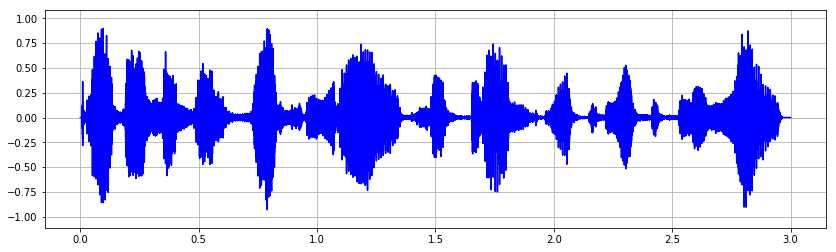

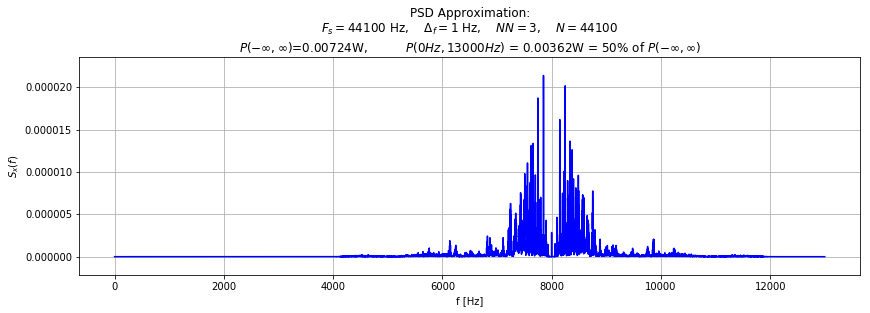

In [9]:
sig_xt_combo = sig_xt_speech.copy()
quick.quickplot(tt,sig_xt_combo.signal())
sig_xt_combo.sig = (sig_xt_speech.signal()+sig_xt_music.signal())/sqrt(2)
showfun.showpsd1(sig_xt_combo,[0,8000+5000,100],Fs)

In [10]:
wavfun.wavwrite(sig_xt_speech.signal(), framerate, 'txmd_speech.wav')
wavfun.wavwrite(sig_xt_music.signal(), framerate, 'txmd_music.wav')
wavfun.wavwrite(sig_xt_combo.signal(), framerate, 'txmd_combo.wav')

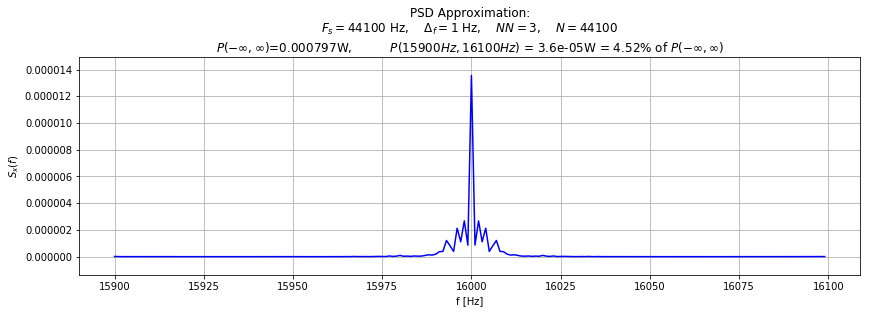

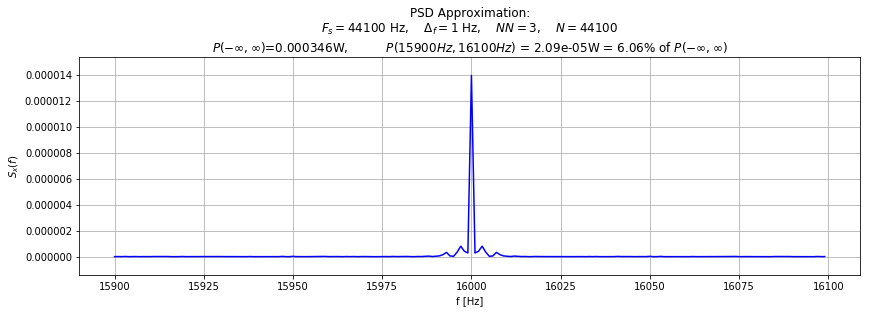

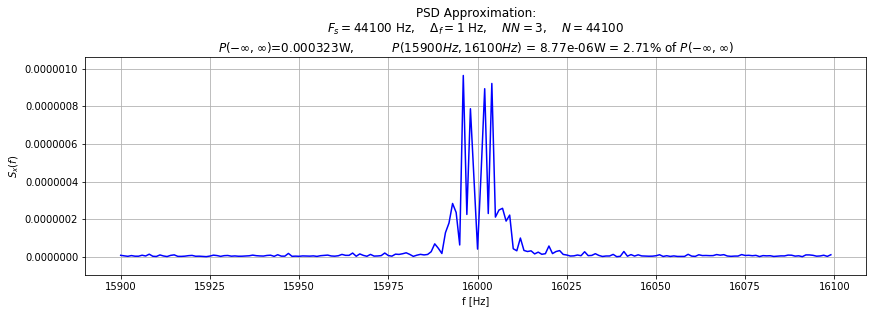

In [11]:
sig_xt_speech_sqrd = sig_xt_speech.copy()
sig_xt_music_sqrd = sig_xt_music.copy()
sig_xt_combo_sqrd = sig_xt_combo.copy()

sig_xt_speech_sqrd.sig = (sig_xt_speech.signal()**2)
sig_xt_music_sqrd.sig = (sig_xt_music.signal()**2)
sig_xt_combo_sqrd.sig = (sig_xt_combo.signal()**2)

showfun.showpsd1(sig_xt_speech_sqrd,[2*fc-100,2*fc+100,100],Fs)
showfun.showpsd1(sig_xt_music_sqrd,[2*fc-100,2*fc+100,100],Fs)
showfun.showpsd1(sig_xt_combo_sqrd,[2*fc-100,2*fc+100,100],Fs)

##### Part D)

For the Python module amfun.py, write a function called amrcvr that demodulates a received AM signal r(t) and produces an estimate m̂(t) of the transmitted message m(t).

Test your receiver with the AM-DSB-SC signals that you produced in part (c). Use the same f m , k m and α m as for the transmitter. 

> Page 2 of the lab outline describes how the music and speech files should not have any DC component, which is consistent with our findings above. 

Coherent
Low Pass Filter: fL= 4000 Hz
Coherent
Low Pass Filter: fL= 4000 Hz
Coherent
Low Pass Filter: fL= 4000 Hz
Coherent
Low Pass Filter: fL= 4000 Hz


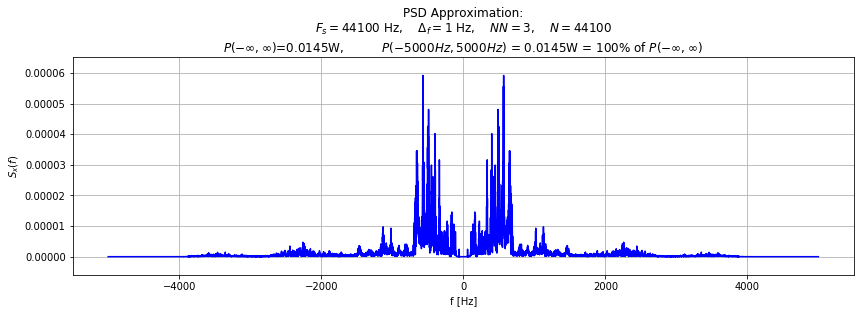

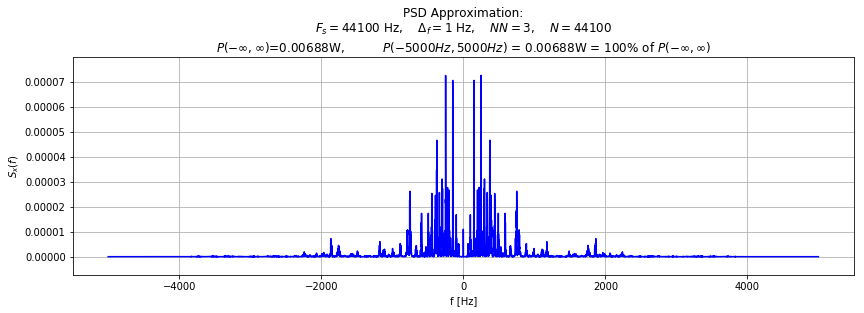

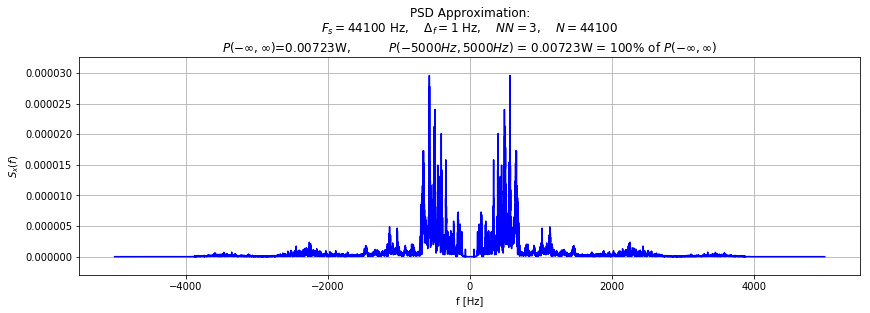

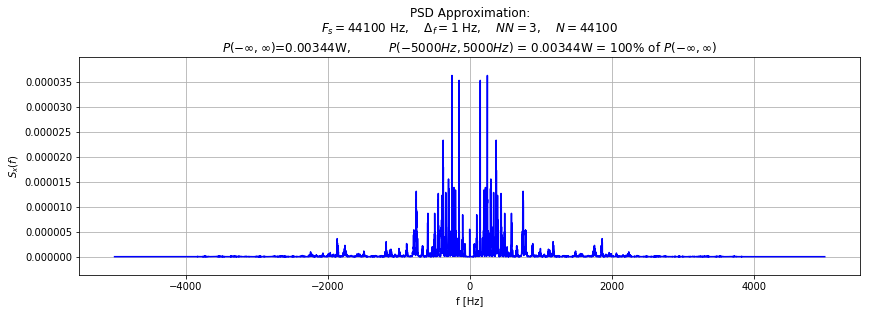

In [12]:
rtype='coh'

sig_mthat_speech = amfun.amrcvr(sig_xt_speech, rtype, fcparms_speech, fmparms)
sig_mthat_music = amfun.amrcvr(sig_xt_music, rtype, fcparms_music, fmparms)
sig_mthat_combo_speech = amfun.amrcvr(sig_xt_combo, rtype, fcparms_speech, fmparms)
sig_mthat_combo_music = amfun.amrcvr(sig_xt_combo, rtype, fcparms_music, fmparms)

showfun.showpsd1(sig_mthat_speech,[-5000,5000,100],Fs)
showfun.showpsd1(sig_mthat_music,[-5000,5000,100],Fs)
showfun.showpsd1(sig_mthat_combo_speech,[-5000,5000,100],Fs)
showfun.showpsd1(sig_mthat_combo_music,[-5000,5000,100],Fs)

wavfun.wavwrite(sig_mthat_speech.signal(), framerate, 'rcvd_speech.wav')
wavfun.wavwrite(sig_mthat_music.signal(), framerate, 'rcvd_music.wav')
wavfun.wavwrite(sig_mthat_combo_speech.signal(), framerate, 'rcvd_combo_speech.wav')
wavfun.wavwrite(sig_mthat_combo_music.signal(), framerate, 'rcvd_combo_music.wav')

Can you recover the speech and music signals from x 3 (t) without any interference between the two signals?

> Yes!! See files 'rcvd_combo_speech.wav' and 'rcvd_combo_music.wav', which were extracted from the speech/music-combined transmitted signal ('txmd_combo.wav')

##### Part E)

Analyze and, if possible, demodulate the AM signals in the wav-files amsig801.wav, amsig802.wav, amsig803.wav, and amsig804.wav. Look at the signals in the frequency domain and listen to the demodulated signals (make a wav file in Python and then use a music player for listening). Try different demodulation methods (coherent, non-coherent, I-Q envelope detection, etc). Interpret the graphs and the different demodulation methods and relate your findings to how the demodulated signals sound.

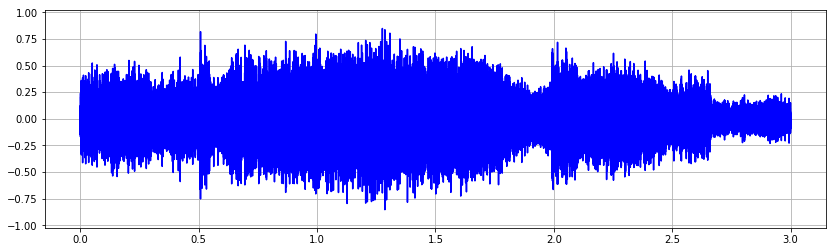

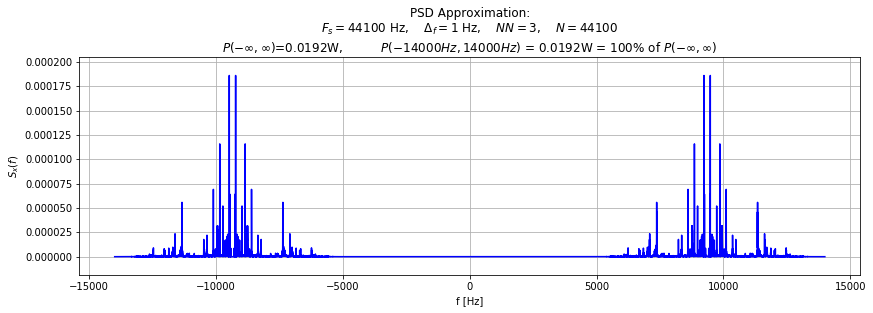

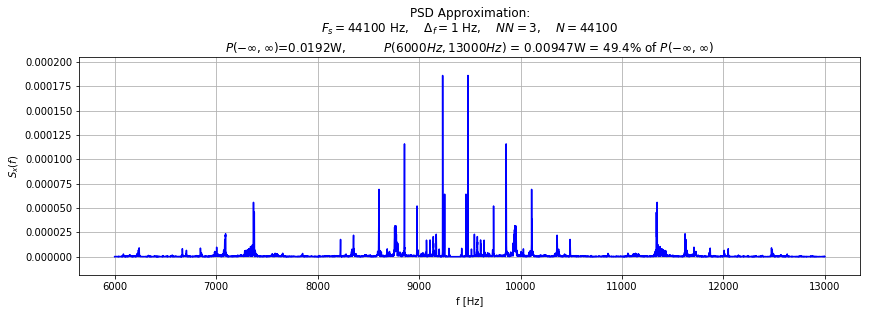

Coherent
Low Pass Filter: fL= 3643 Hz


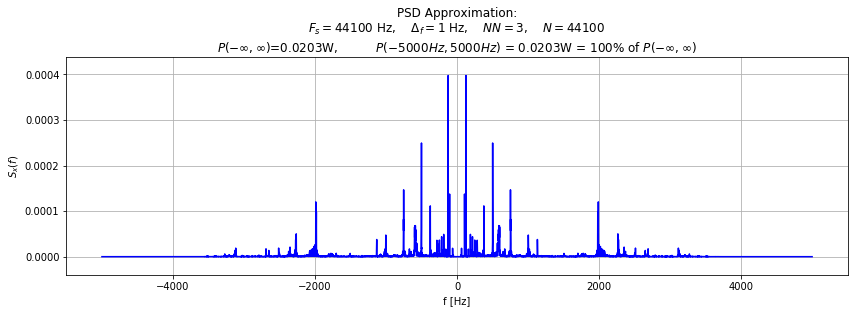

In [13]:
[amsig801, framerate] = wavfun.wavread("amsig801.wav")
tt=quick.quicktt(amsig801,framerate) # Same framerate, same length
quick.quickplot(tt,amsig801)
sig_xt_amsig801 = ecen.sigWave(amsig801, framerate)

showfun.showpsd1(sig_xt_amsig801,[-14000, 14000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig801,[6000, 13000, 0],framerate) #Plot S_x(f)

fc = 9357 # This is VERY sensative. Fine tuning required trial and error arounf f=9360Hz
thetac = 0
fcparms=[fc,thetac]
fm = 13000-fc
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]
sig_mthat_amsig801 = amfun.amrcvr(sig_xt_amsig801, 'coh', fcparms, fmparms)

showfun.showpsd1(sig_mthat_amsig801,[-5000,5000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig801.signal(), framerate, 'rcvd_amsig801.wav')

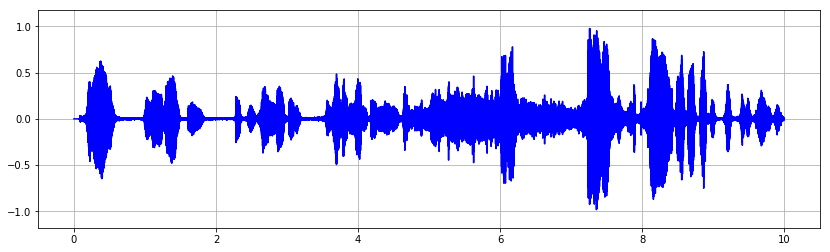

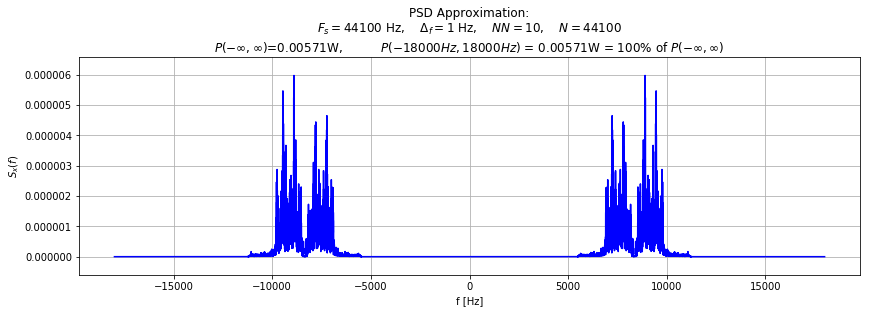

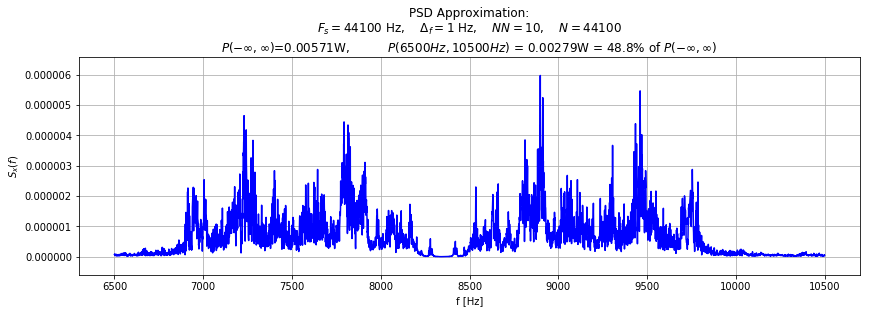

Coherent
Band Pass Filter: fBW= 1650 Hz, fc= 9175.0 Hz
Low Pass Filter: fL= 4000 Hz


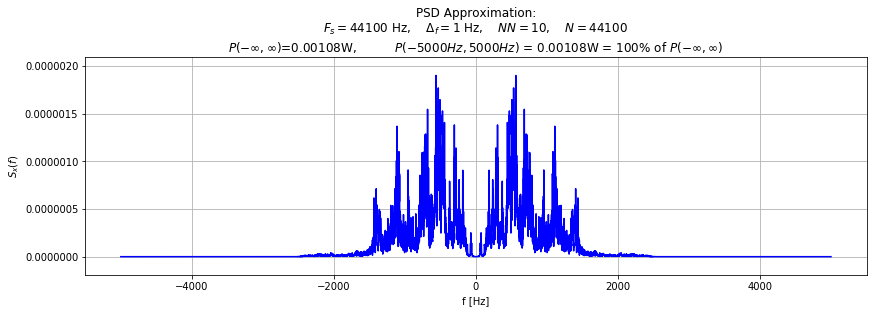

In [14]:
[amsig802, framerate] = wavfun.wavread("amsig802.wav")
tt=quick.quicktt(amsig802,framerate) # Same framerate, same length
quick.quickplot(tt,amsig802)
sig_xt_amsig802 = ecen.sigWave(amsig802, framerate)

showfun.showpsd1(sig_xt_amsig802,[-18000, 18000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig802,[6500, 10500, 0],framerate) #Plot S_x(f)

fc = 8350
thetac = -pi/2
fcparms=[fc,thetac]

fm = 4000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 10000-fc
fcB = fc+fBW/2
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig802 = amfun.amrcvr(sig_xt_amsig802, 'coh', fcparms, fmparms, fBparms)

showfun.showpsd1(sig_mthat_amsig802,[-5000,5000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig802.signal(), framerate, 'rcvd_amsig802.wav')

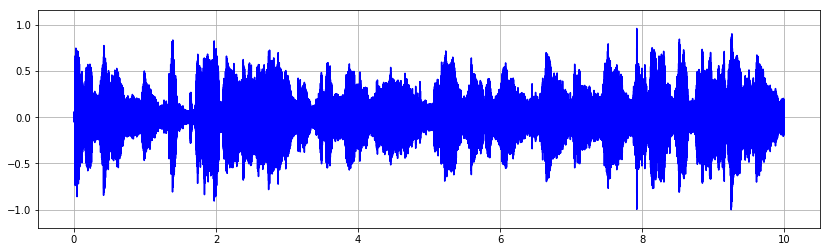

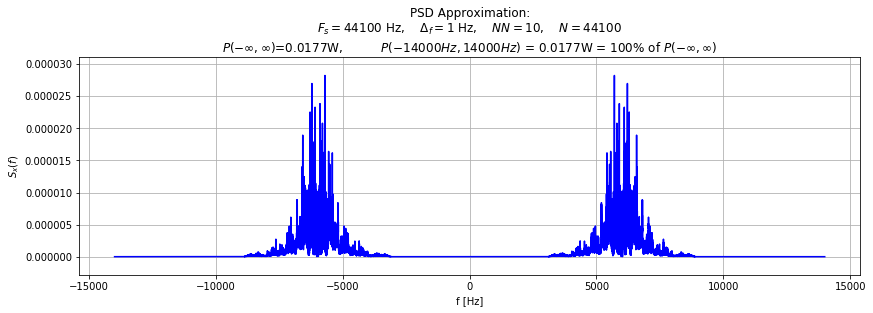

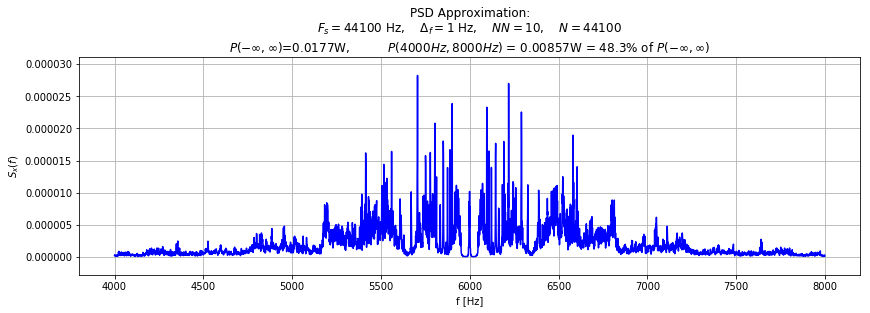

Coherent
Band Pass Filter: fBW= 2000 Hz, fc= 6999.0 Hz
Low Pass Filter: fL= 2001 Hz


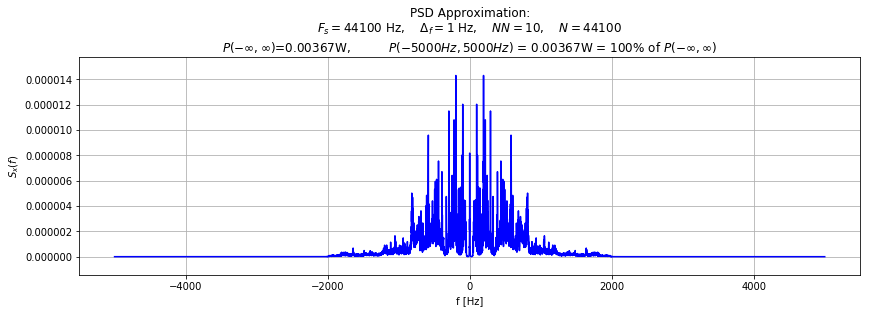

In [15]:
[amsig803, framerate] = wavfun.wavread("amsig803.wav")
tt=quick.quicktt(amsig803,framerate) # Same framerate, same length
quick.quickplot(tt,amsig803)
sig_xt_amsig803 = ecen.sigWave(amsig803, framerate)

showfun.showpsd1(sig_xt_amsig803,[-14000, 14000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig803,[4000, 8000, 0],framerate) #Plot S_x(f)

fc = 5999
thetac = -pi/2
fcparms=[fc,thetac]

fm = 8000-fc
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 2000
fcB = fc+fBW/2
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig803 = amfun.amrcvr(sig_xt_amsig803, 'coh', fcparms, fmparms,fBparms,True)

showfun.showpsd1(sig_mthat_amsig803,[-5000,5000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig803.signal(), framerate, 'rcvd_amsig803.wav')

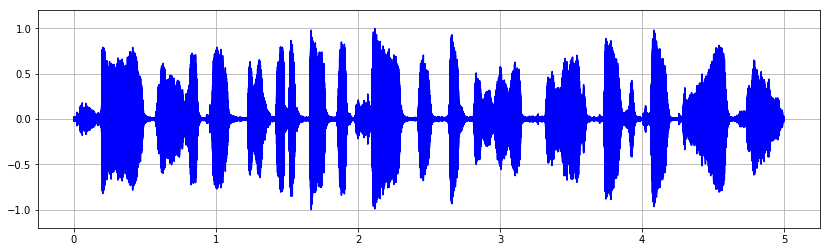

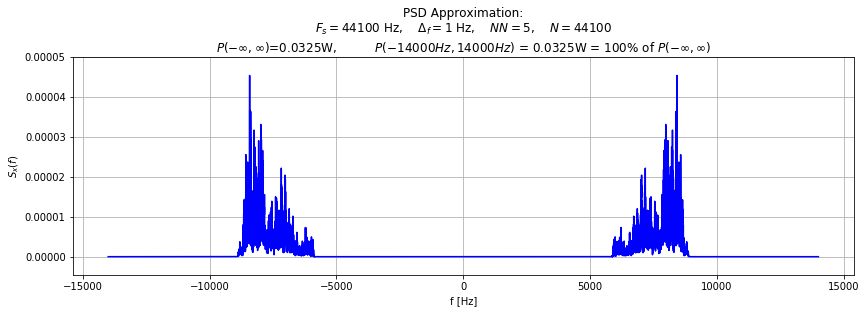

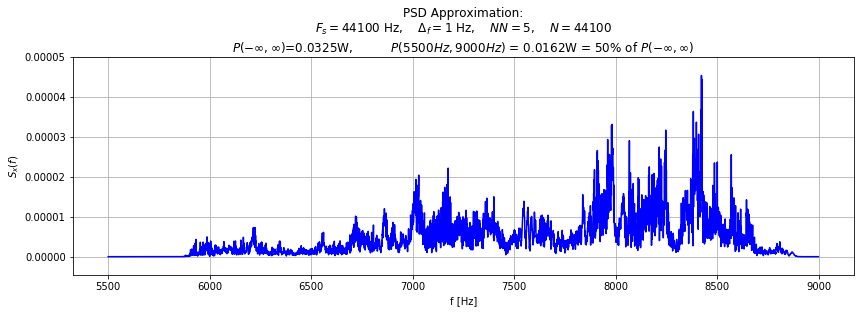

Coherent
Low Pass Filter: fL= 4000 Hz


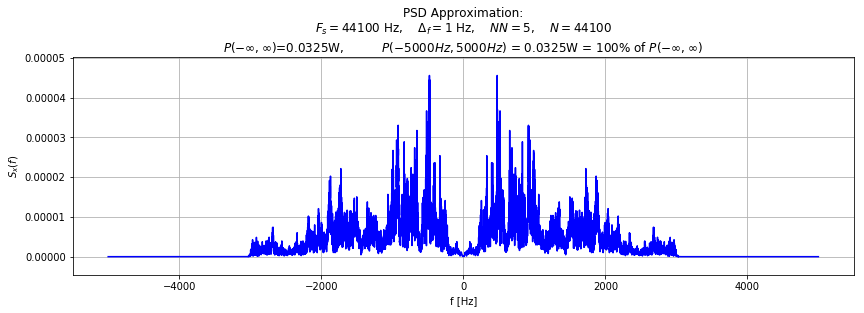

In [16]:
[amsig804, framerate] = wavfun.wavread("amsig804.wav")
tt=quick.quicktt(amsig804,framerate) # Same framerate, same length
quick.quickplot(tt,amsig804)
sig_xt_amsig804 = ecen.sigWave(amsig804, framerate)

showfun.showpsd1(sig_xt_amsig804,[-14000, 14000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig804,[5500, 9000, 0],framerate) #Plot S_x(f)

fc = 8900 # This signal looks like it's already been band pass filtered!
thetac = -pi/2
fcparms=[fc,thetac]

fm = 4000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 9000-fc
fcB = fc+fBW/2
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig804 = amfun.amrcvr(sig_xt_amsig804, 'coh', fcparms, fmparms,[])

showfun.showpsd1(sig_mthat_amsig804,[-5000,5000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig804.signal(), framerate, 'rcvd_amsig804.wav')

> ANSWER

##### Part F)

Repeat (e) for the AM signals in the wav-files amsig805.wav, amsig806.wav, and
amsig807.wav.

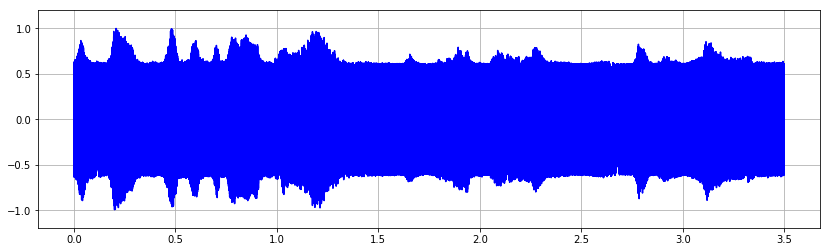

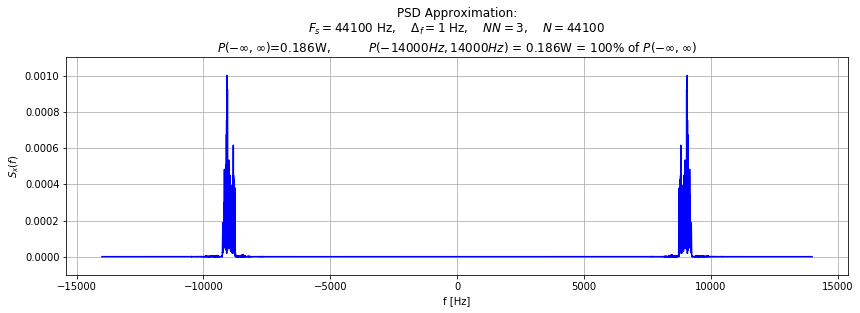

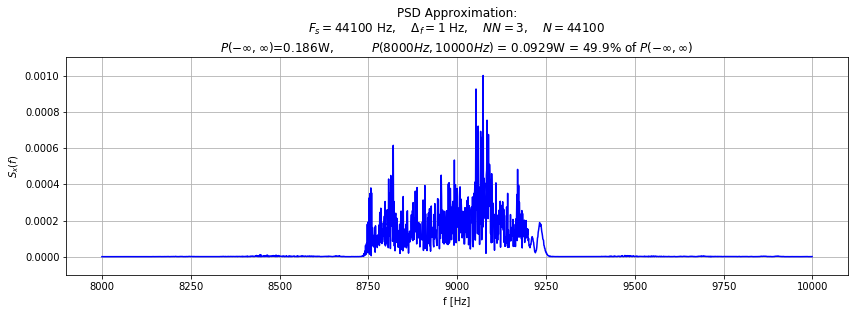

Absolute Value Envelope Detector
Low Pass Filter: fL= 5000 Hz


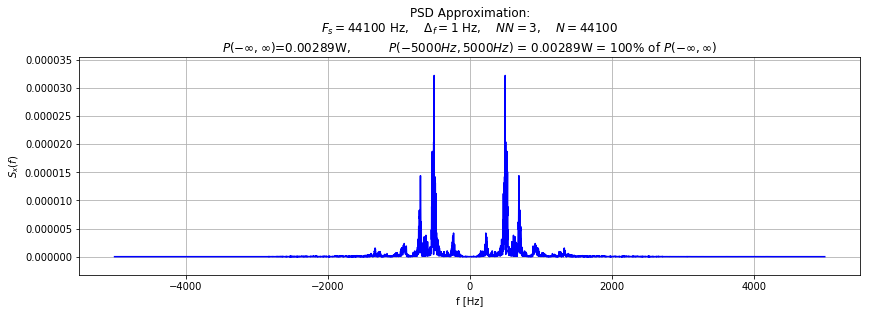

In [17]:
[amsig805, framerate] = wavfun.wavread("amsig805.wav")
tt=quick.quicktt(amsig805,framerate) # Same framerate, same length
quick.quickplot(tt,amsig805)
sig_xt_amsig805 = ecen.sigWave(amsig805, framerate)

showfun.showpsd1(sig_xt_amsig805,[-14000, 14000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig805,[8000, 10000, 0],framerate) #Plot S_x(f)

fc = 9100 # Somewhere in the middle of the peak cluster...maybe toward the larger peaks?
thetac = -pi/2
fcparms=[fc,thetac]

fm = 5000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 9000-fc
fcB = fc+fBW/2
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig805 = amfun.amrcvr(sig_xt_amsig805, 'abs', fcparms, fmparms,[],True)

showfun.showpsd1(sig_mthat_amsig805,[-5000,5000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig805.signal(), framerate, 'rcvd_amsig805.wav')

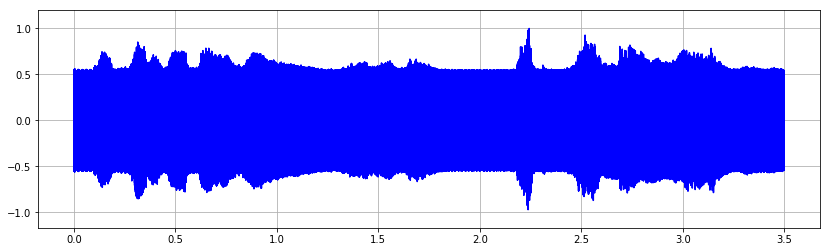

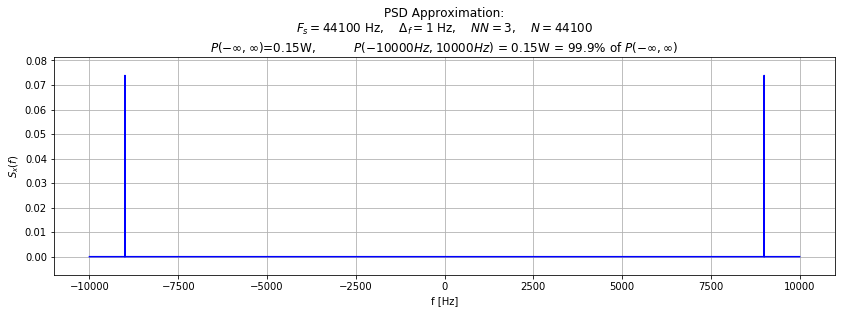

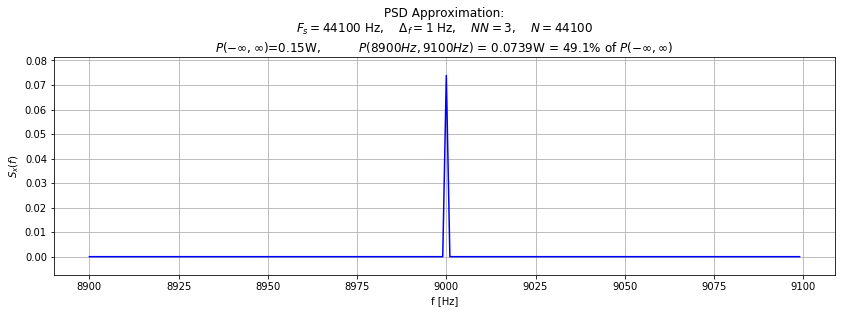

Absolute Value Envelope Detector
Low Pass Filter: fL= 1700 Hz


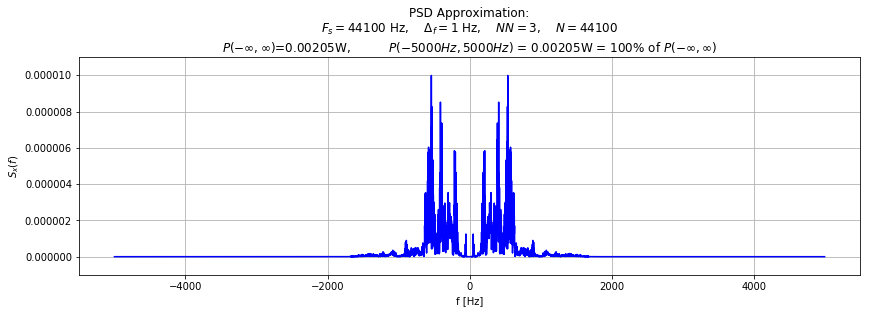

In [18]:
[amsig806, framerate] = wavfun.wavread("amsig806.wav")
tt=quick.quicktt(amsig806,framerate) # Same framerate, same length
quick.quickplot(tt,amsig806)
sig_xt_amsig806 = ecen.sigWave(amsig806, framerate)

showfun.showpsd1(sig_xt_amsig806,[-10000, 10000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig806,[8900, 9100, 0],framerate) #Plot S_x(f)

fc = 9000 
thetac = -pi/2
fcparms=[fc,thetac]

fm = 1700
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 9000-fc
fcB = fc+fBW/2
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig806 = amfun.amrcvr(sig_xt_amsig806, 'abs', fcparms, fmparms,[],True)

showfun.showpsd1(sig_mthat_amsig806,[-5000,5000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig806.signal(), framerate, 'rcvd_amsig806.wav')

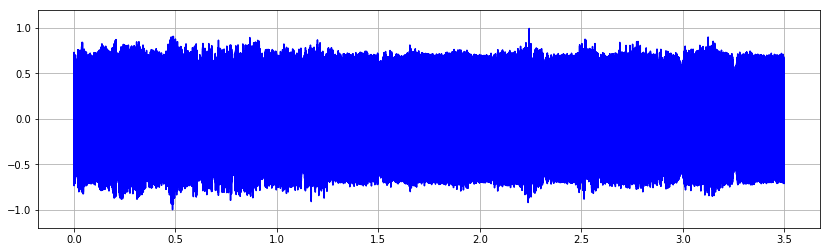

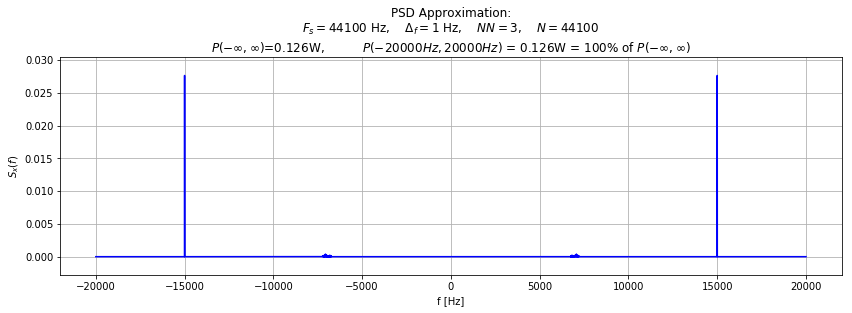

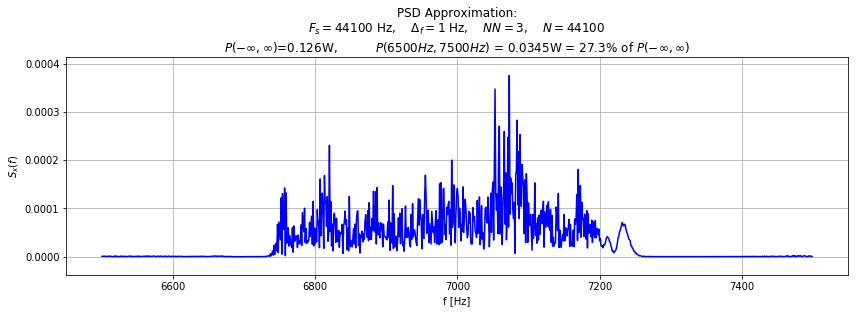

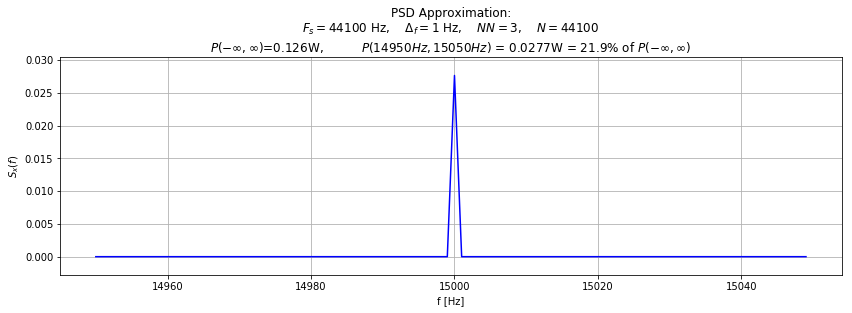

Absolute Value Envelope Detector
Band Pass Filter: fBW= 2000 Hz, fc= 7000 Hz
Low Pass Filter: fL= 6000 Hz


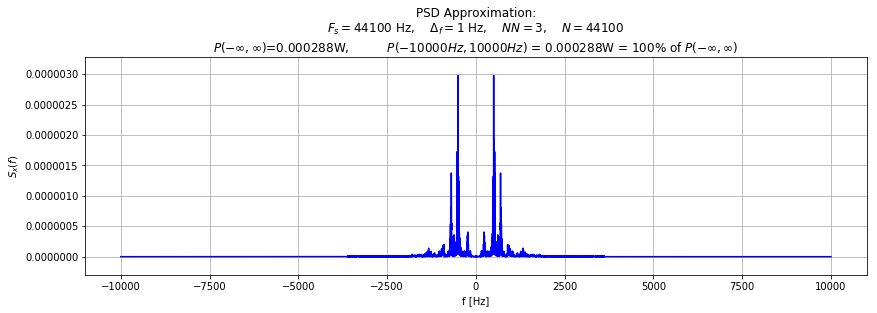

Absolute Value Envelope Detector
Band Pass Filter: fBW= 1000 Hz, fc= 15000 Hz
Low Pass Filter: fL= 5000 Hz


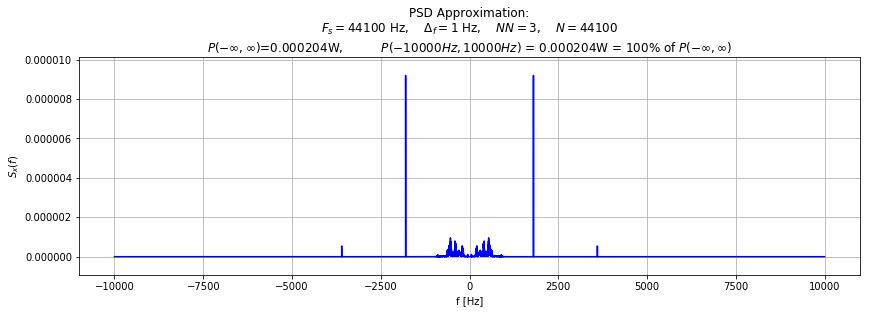

In [19]:
[amsig807, framerate] = wavfun.wavread("amsig807.wav")
tt=quick.quicktt(amsig807,framerate) # Same framerate, same length
quick.quickplot(tt,amsig807)
sig_xt_amsig807 = ecen.sigWave(amsig807, framerate)

showfun.showpsd1(sig_xt_amsig807,[-20000, 20000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig807,[6500, 7500, 0],framerate) #Plot S_x(f)
showfun.showpsd1(sig_xt_amsig807,[14950, 15050, 0],framerate) #Plot S_x(f)

fc = 7000 
thetac = -pi/2
fcparms=[fc,thetac]

fm = 6000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 9000-fc
fcB = fc
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig807 = amfun.amrcvr(sig_xt_amsig807, 'abs', fcparms, fmparms,fBparms,True)

showfun.showpsd1(sig_mthat_amsig807,[-10000,10000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig807.signal(), framerate, 'rcvd_amsig807a.wav')




fc = 15000 
thetac = -pi/2
fcparms=[fc,thetac]

fm = 5000
km = 15
alfam = 0.05
fmparms = [fm,km,alfam]

fBW = 1000
fcB = fc
kB = km
alfaB = alfam
fBparms = [fBW,fcB,kB,alfaB]

sig_mthat_amsig807 = amfun.amrcvr(sig_xt_amsig807, 'abs', fcparms, fmparms,fBparms,True)

showfun.showpsd1(sig_mthat_amsig807,[-10000,10000,100],Fs)
wavfun.wavwrite(sig_mthat_amsig807.signal(), framerate, 'rcvd_amsig807b.wav')

> ANSWER

##### Part G)

Build the GNU Radio flowgraph shown below to demodulate the two AM-DSB-SC signals in the file AMsignal_002.bin. The file was recorded using a sampling rate of 512 kHz and each sample is a 32-bit (real) floating point number. 

The nominal carrier frequencies of the two signals are f c1 = 124 kHz and f c2 = 144 kHz, but the transmitters were off a little bit (within ±10 Hz) from the nominal values. The receiver attempts to demodulate the signals with the nominal carrier frequency values, followed by fine tuning in the range from -10 to +10 Hz. The goal of this experiment is to find out how successful that strategy is when working with real-valued signal processing and to discuss its advantages and shortcomings.

> ANSWER

## EC 02 - QAM Transmitter/Receiver

In [20]:
from pylab import *
import ecen4652 as ecen
import quick
import filtfun
import amfun
import showfun

##### Part A)


Low Pass Filter: fL= 1000 Hz


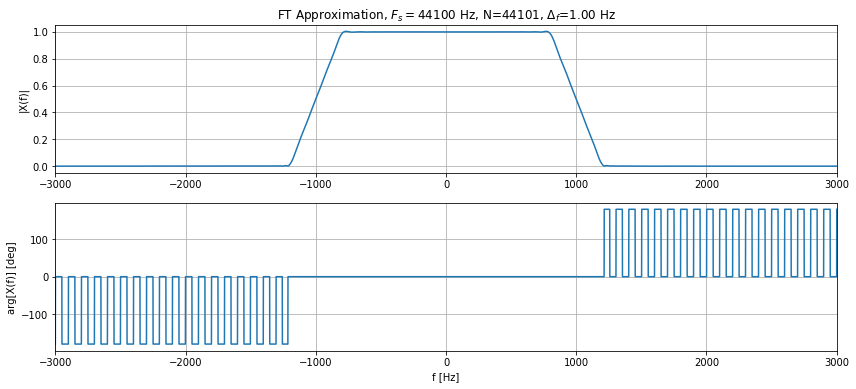

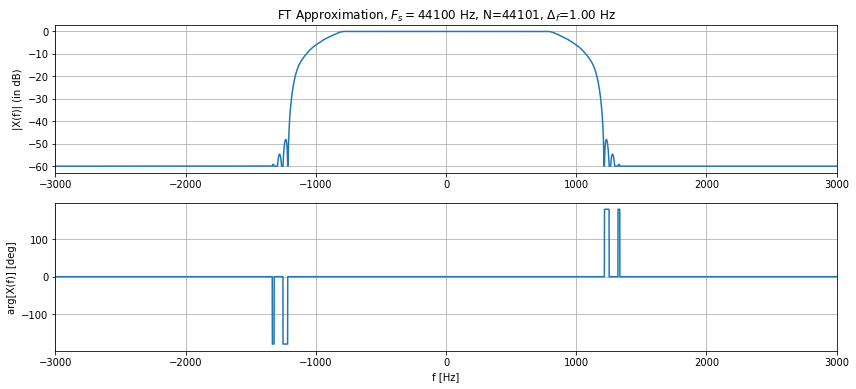

In [21]:
Fs=44100
t0=-0.5
t=1
xt=concatenate([zeros(int(Fs/2)),[1],zeros(Fs-int(Fs/2))])
sig_xt=ecen.sigWave(xt, Fs, t0)
k=20
alfa=0.2

fL=1000
fparms=[fL]
[trap_xt,n]=filtfun.trapfilt_cc(sig_xt,fparms,k,alfa)
showfun.showft(trap_xt,[-3000,3000,0])
showfun.showft(trap_xt,[-3000,3000,-60])

Band Pass Filter: fBW= 500 Hz, fc= 2000 Hz


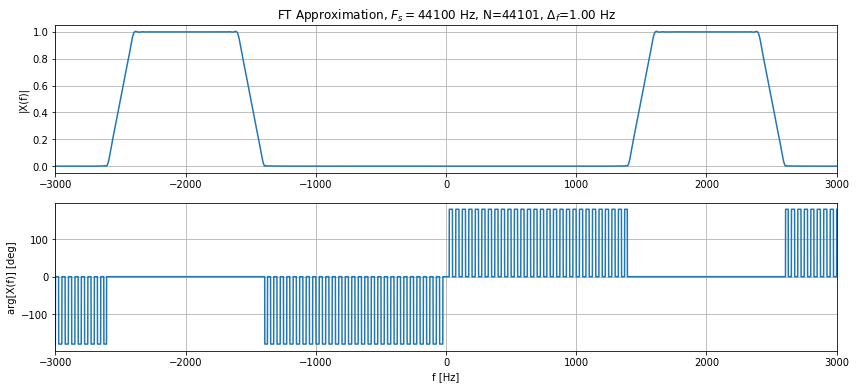

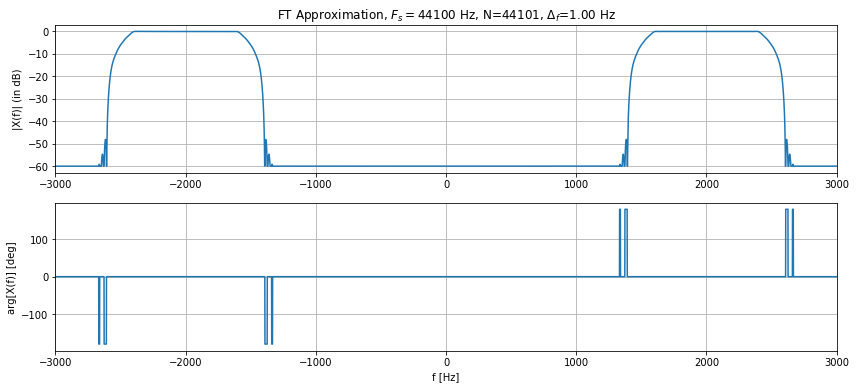

In [22]:
fBW=500
fc=2000
fparms=[fBW,fc]
[trap_xt,n]=filtfun.trapfilt_cc(sig_xt,fparms,k,alfa)
showfun.showft(trap_xt,[-3000,3000,0])
showfun.showft(trap_xt,[-3000,3000,-60])

##### Part B)


##### Part C)


##### Part D)


##### Part E)


##### Part F)
